<table align="left" width=100%>
    <tr>
        <td width="12%">
            <img src="../../../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>Beer Forecast Model - 03 </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/03_beer_prediction/beer_forecast_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/03_beer_prediction/beer_forecast_model.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.

The objective of this work will be to demonstrate the impacts of variables on beer consumption in a given region and the consumption forecast for certain scenarios.
The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average).

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Example: Read Titanic dataset
beer_data_path = '../../data/Consumo_cerveja.csv'
df = pd.read_csv(beer_data_path)

In [103]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(941, 7)

In [104]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [105]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [106]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
Data,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05
Temperatura Media (C),"27,3","27,02","24,82","23,98","23,82"
Temperatura Minima (C),"23,9","24,5","22,4","21,5",21
Temperatura Maxima (C),"32,5","33,5","29,9","28,6","28,3"
Precipitacao (mm),0,0,0,"1,2",0
Final de Semana,0.0,0.0,1.0,1.0,0.0
Consumo de cerveja (litros),25.461,28.972,30.814,29.799,28.9


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. This can be useful when you want to examine the initial data points across columns more closely.

In [107]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df.columns.str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.replace(' ', '_')

Index(['Data', 'Temperatura_Media_C', 'Temperatura_Minima_C',
       'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana',
       'Consumo_de_cerveja_litros'],
      dtype='object')

In [109]:
# Modify all column names to remove '(', ')', and replace spaces with '_'
df.columns = df.columns.str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.replace(' ', '_')
df

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#1.6 df.describe() - Five Point Summary
df.describe()

,Final_de_Semana,Consumo_de_cerveja_litros
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


Key Points:

Count: The number of non-null entries.

Mean: The average of the values.

Standard Deviation (std): A measure of the amount of variation or dispersion of the values.

Minimum (min): The smallest value.

25th Percentile (25%): The value below which 25% of the data falls (first quartile).

50th Percentile (50%): The median value, or the value below which 50% of the data falls.

75th Percentile (75%): The value below which 75% of the data falls (third quartile).

Maximum (max): The largest value.

By using df.describe(), you can quickly get a comprehensive overview of the key statistical properties of your DataFrame, which is particularly useful for data exploration and preliminary analysis.

In [111]:
#2_1.Type Casting (astype) 

In [112]:
#3 - Missing Value Treatment

In [113]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

Data                         576
Temperatura_Media_C          576
Temperatura_Minima_C         576
Temperatura_Maxima_C         576
Precipitacao_mm              576
Final_de_Semana              576
Consumo_de_cerveja_litros    576
dtype: int64

In [114]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentage of missing values for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Data                         61.211477
Temperatura_Media_C          61.211477
Temperatura_Minima_C         61.211477
Temperatura_Maxima_C         61.211477
Precipitacao_mm              61.211477
Final_de_Semana              61.211477
Consumo_de_cerveja_litros    61.211477
dtype: float64


In [115]:
df.dropna(how="all")

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [116]:
df = df.dropna(how="all")

In [117]:
df.isnull().any()

Data                         False
Temperatura_Media_C          False
Temperatura_Minima_C         False
Temperatura_Maxima_C         False
Precipitacao_mm              False
Final_de_Semana              False
Consumo_de_cerveja_litros    False
dtype: bool

In [118]:
df.head()

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [119]:
df.replace({",":"."},regex=True)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [120]:
df = df.replace({",":"."},regex=True)

In [121]:
df.head()

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [122]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
Data,0,0.0,object
Temperatura_Media_C,0,0.0,object
Temperatura_Minima_C,0,0.0,object
Temperatura_Maxima_C,0,0.0,object
Precipitacao_mm,0,0.0,object
Final_de_Semana,0,0.0,float64
Consumo_de_cerveja_litros,0,0.0,float64


In [123]:
#4 - Univariate Analysis

#4_1 - Summary Statitics - using describe - Five Point Summary
#4_2 - Visualize Distributions
#4_2_1 - Visualize Using Box plots
#4_2_2 - Visualize Using density plots

#5 - Bivariate Analysis
#6 - Multivariate Analysis

In [124]:
#4_1_1. Five point summary - df.describe()
df.describe()

,Final_de_Semana,Consumo_de_cerveja_litros
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [125]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm
count,365,365,365,365,365
unique,365,277,110,151,93
top,2015-01-01,22.76,19.3,28,0
freq,1,5,11,7,218


In [126]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm
count,365,365,365,365,365
unique,365,277,110,151,93
top,2015-01-01,22.76,19.3,28,0
freq,1,5,11,7,218


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       365 non-null    object 
 1   Temperatura_Media_C        365 non-null    object 
 2   Temperatura_Minima_C       365 non-null    object 
 3   Temperatura_Maxima_C       365 non-null    object 
 4   Precipitacao_mm            365 non-null    object 
 5   Final_de_Semana            365 non-null    float64
 6   Consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [128]:
pd.to_datetime(df["Data"])

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

In [129]:
df["Data"]=pd.to_datetime(df["Data"])

In [130]:
days=["Monday","Tuesdat","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [131]:
df["Data"].apply(lambda a : days[a.weekday()])

0       Thursday
1         Friday
2       Saturday
3         Sunday
4         Monday
         ...    
360       Sunday
361       Monday
362      Tuesdat
363    Wednesday
364     Thursday
Name: Data, Length: 365, dtype: object

In [132]:
df["Day"]=df["Data"].apply(lambda a : days[a.weekday()])

In [133]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

Final_de_Semana               0.204305
Consumo_de_cerveja_litros    19.352457
dtype: float64

The variance indicates how much is the data varying from the mean. The output suggests that the variable Final_de_Semana has the least variance and the variable Consumo_de_cerveja_litros has the maximum variance.

In [134]:
df.std(numeric_only=True)

Final_de_Semana              0.452001
Consumo_de_cerveja_litros    4.399143
dtype: float64

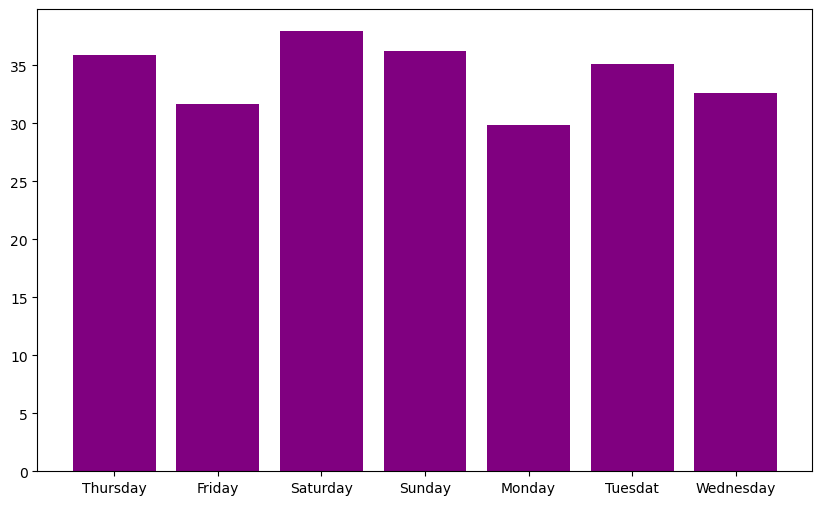

In [135]:
plt.figure(figsize=(10,6))
plt.bar(df["Day"],df["Consumo_de_cerveja_litros"],color="purple")
plt.show()

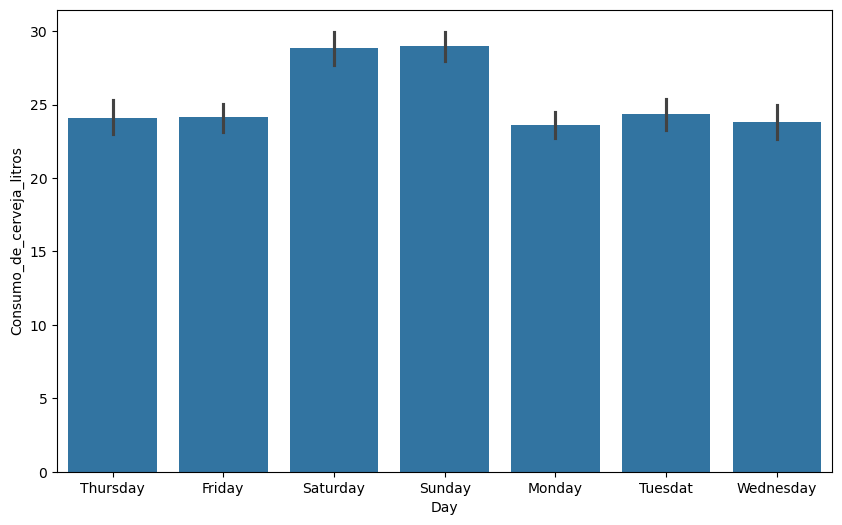

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Day",y="Consumo_de_cerveja_litros",data=df)
plt.show()

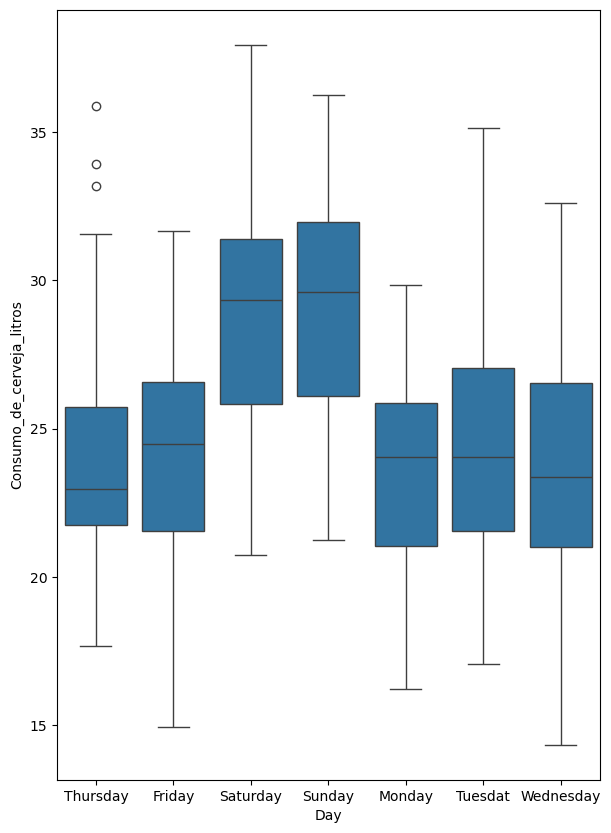

In [137]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Day", y="Consumo_de_cerveja_litros", data=df)
plt.show()

In [138]:
df.columns

Index(['Data', 'Temperatura_Media_C', 'Temperatura_Minima_C',
       'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana',
       'Consumo_de_cerveja_litros', 'Day'],
      dtype='object')

In [139]:
df.drop(["Data","Day"],axis=1,inplace=True)

In [140]:
df.head()

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,27.3,23.9,32.5,0,0.0,25.461
1,27.02,24.5,33.5,0,0.0,28.972
2,24.82,22.4,29.9,0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21,28.3,0,0.0,28.900


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperatura_Media_C        365 non-null    object 
 1   Temperatura_Minima_C       365 non-null    object 
 2   Temperatura_Maxima_C       365 non-null    object 
 3   Precipitacao_mm            365 non-null    object 
 4   Final_de_Semana            365 non-null    float64
 5   Consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(4)
memory usage: 20.0+ KB


In [142]:
df.apply(pd.to_numeric)

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [143]:
df=df.apply(pd.to_numeric)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperatura_Media_C        365 non-null    float64
 1   Temperatura_Minima_C       365 non-null    float64
 2   Temperatura_Maxima_C       365 non-null    float64
 3   Precipitacao_mm            365 non-null    float64
 4   Final_de_Semana            365 non-null    float64
 5   Consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [145]:
df_corr = df.corr()
df_corr

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
Temperatura_Media_C,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima_C,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima_C,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao_mm,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo_de_cerveja_litros,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


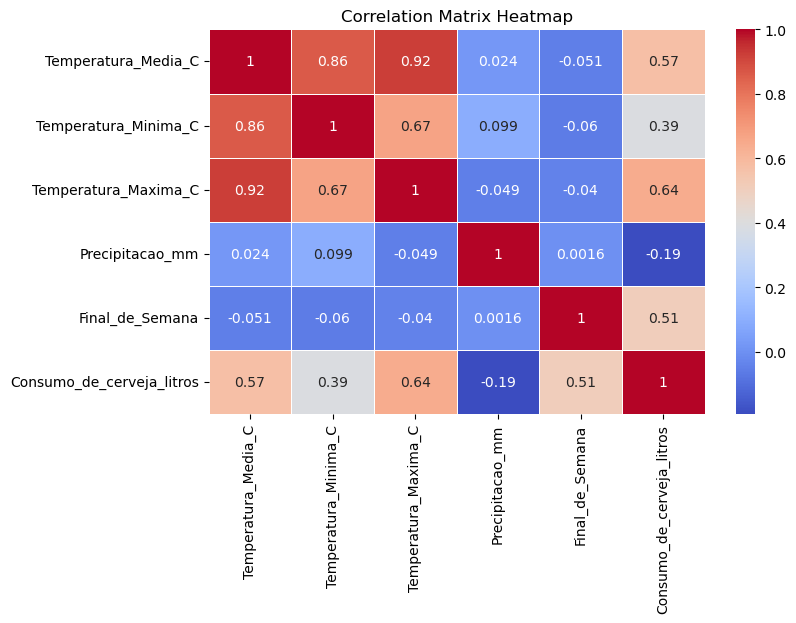

In [146]:
# Compute the correlation matrix
df_corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

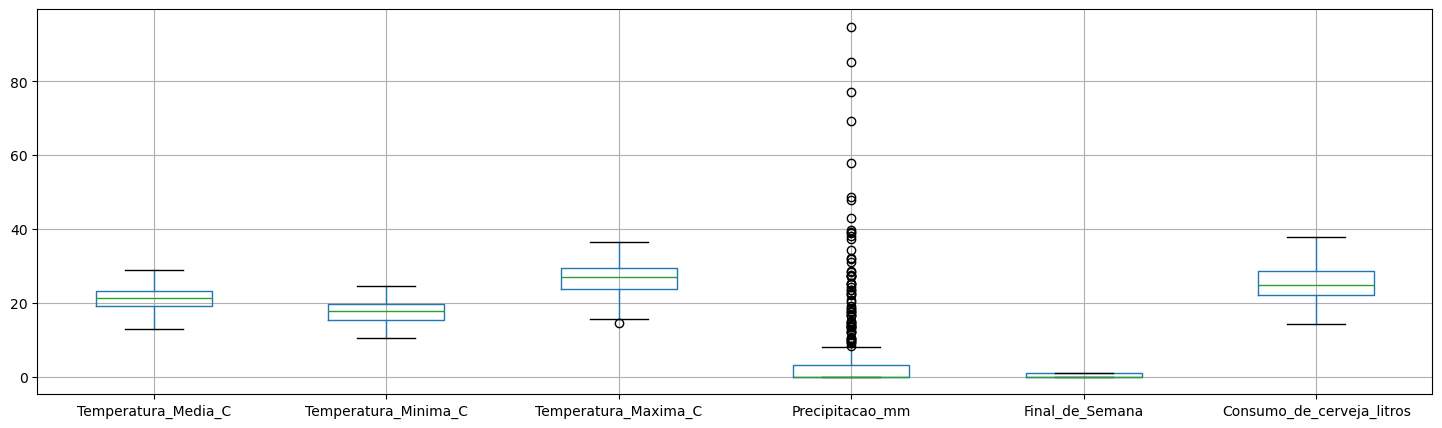

In [147]:
# Plot the heatmap
plt.figure(figsize=(18, 5))
df.boxplot()
plt.show()

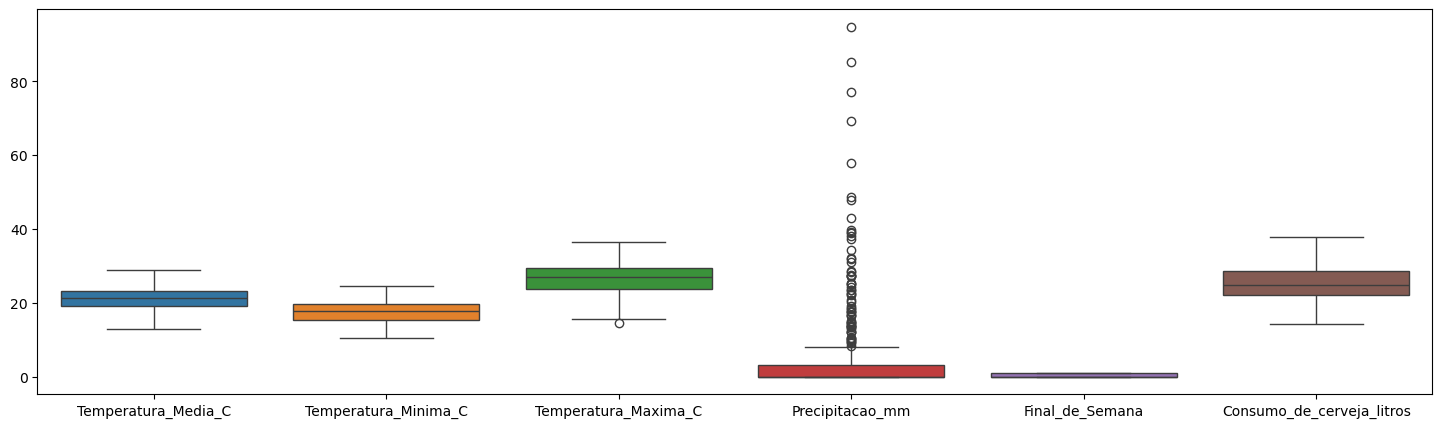

In [148]:
# Plot the heatmap
plt.figure(figsize=(18, 5))
sns.boxplot(data=df)
plt.show()

In [149]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

Temperatura_Media_C           10.113085
Temperatura_Minima_C           7.987322
Temperatura_Maxima_C          18.639647
Precipitacao_mm              154.202846
Final_de_Semana                0.204305
Consumo_de_cerveja_litros     19.352457
dtype: float64

The variance indicates how much is the data varying from the mean. The output suggests that the variable Final_de_Semana has the least variance and the variable Precipitacao_mm has the maximum variance.

In [150]:
df.std(numeric_only=True)

Temperatura_Media_C           3.180108
Temperatura_Minima_C          2.826185
Temperatura_Maxima_C          4.317366
Precipitacao_mm              12.417844
Final_de_Semana               0.452001
Consumo_de_cerveja_litros     4.399143
dtype: float64

Interpretation: We can see that the variable 'Final_de_Semana' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [151]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)
df_num

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [152]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index([], dtype='object')

In [153]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

Temperatura_Media_C          4.260
Temperatura_Minima_C         4.300
Temperatura_Maxima_C         5.600
Precipitacao_mm              3.200
Final_de_Semana              1.000
Consumo_de_cerveja_litros    6.623
dtype: float64


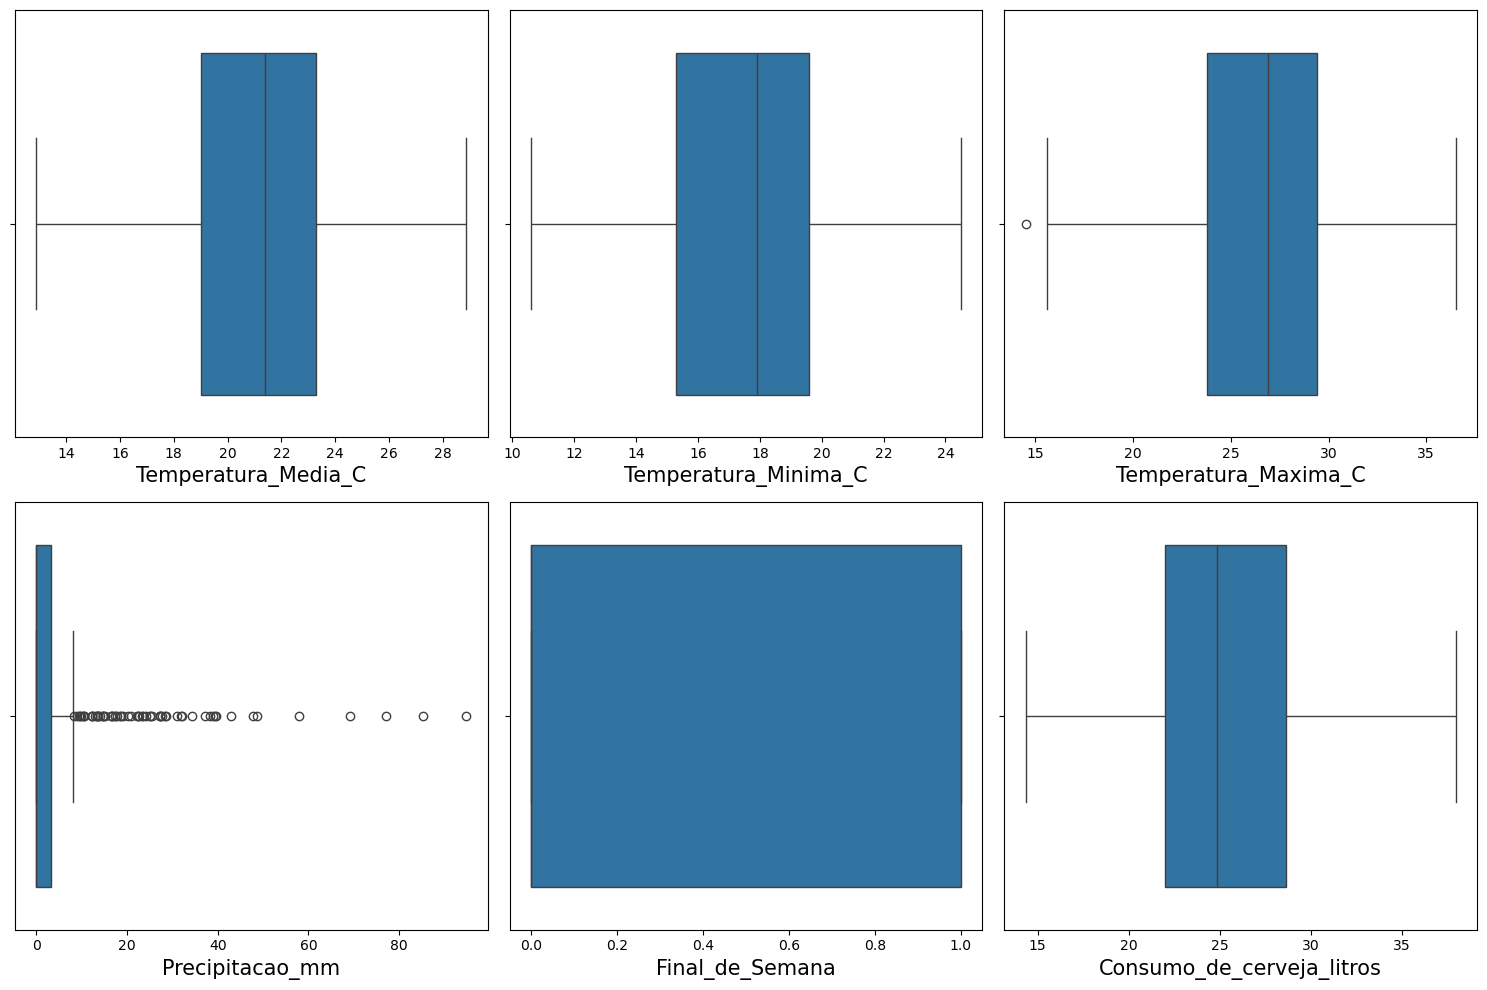

In [154]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

In [156]:
df_cat.count()

Series([], dtype: int64)

In [157]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get a list of categorical variables from the DataFrame
# categorical_variables = df_cat.columns[1:]

# # Calculate the number of rows and columns for subplots
# num_rows = 2
# num_cols = 3

# # Create a grid of subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# # Iterate over categorical variables and their corresponding subplots
# for variable, subplot in zip(categorical_variables, axes.flatten()):
#     sns.countplot(data=df, x=variable, ax=subplot)
#     subplot.set_xticklabels(subplot.get_xticklabels())
#     subplot.set_xlabel(variable, fontsize=15)

# plt.tight_layout(pad=4.0)
# plt.show()

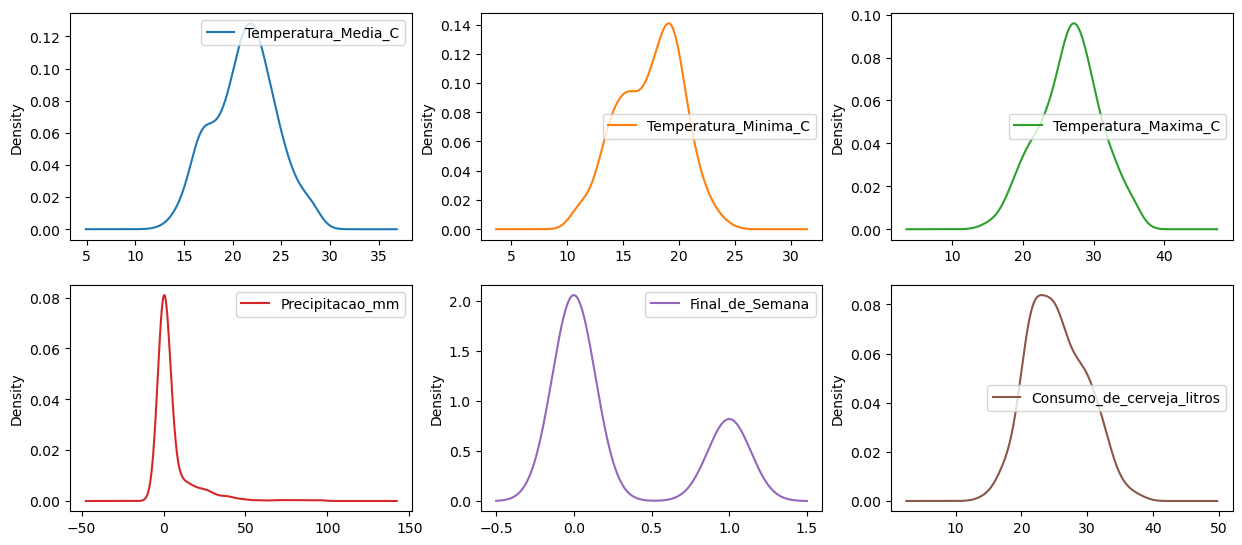

In [159]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [160]:
df.columns

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

/var/folders/kd/yddgdhm92qxgkw2js4t89ksr0000gn/T/ipykernel_40894/414294457.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Consumo_de_cerveja_litros, kde=True)


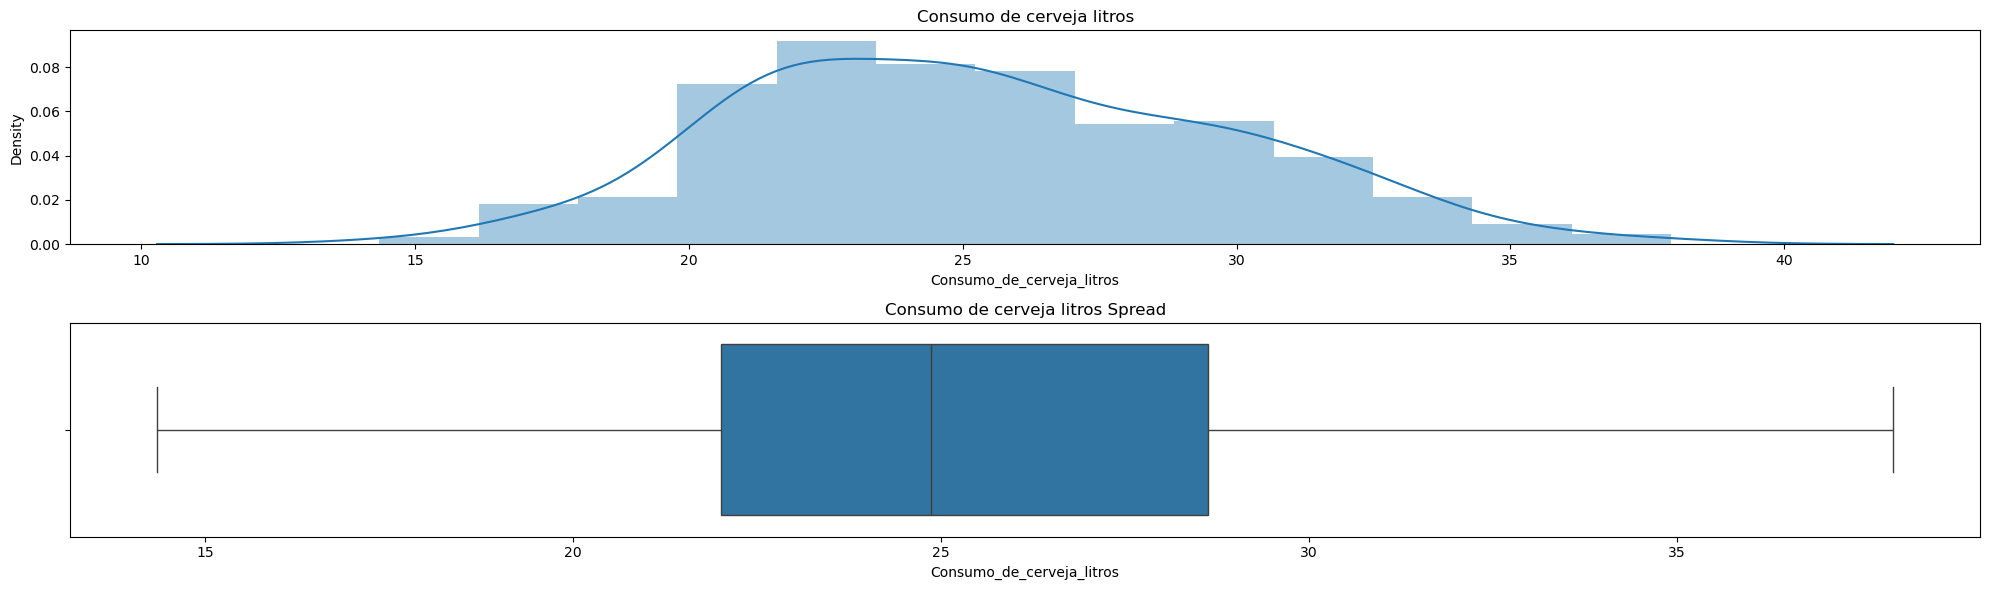

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Consumo de cerveja litros')
sns.distplot(df.Consumo_de_cerveja_litros, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Consumo de cerveja litros Spread')
sns.boxplot(x=df.Consumo_de_cerveja_litros, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


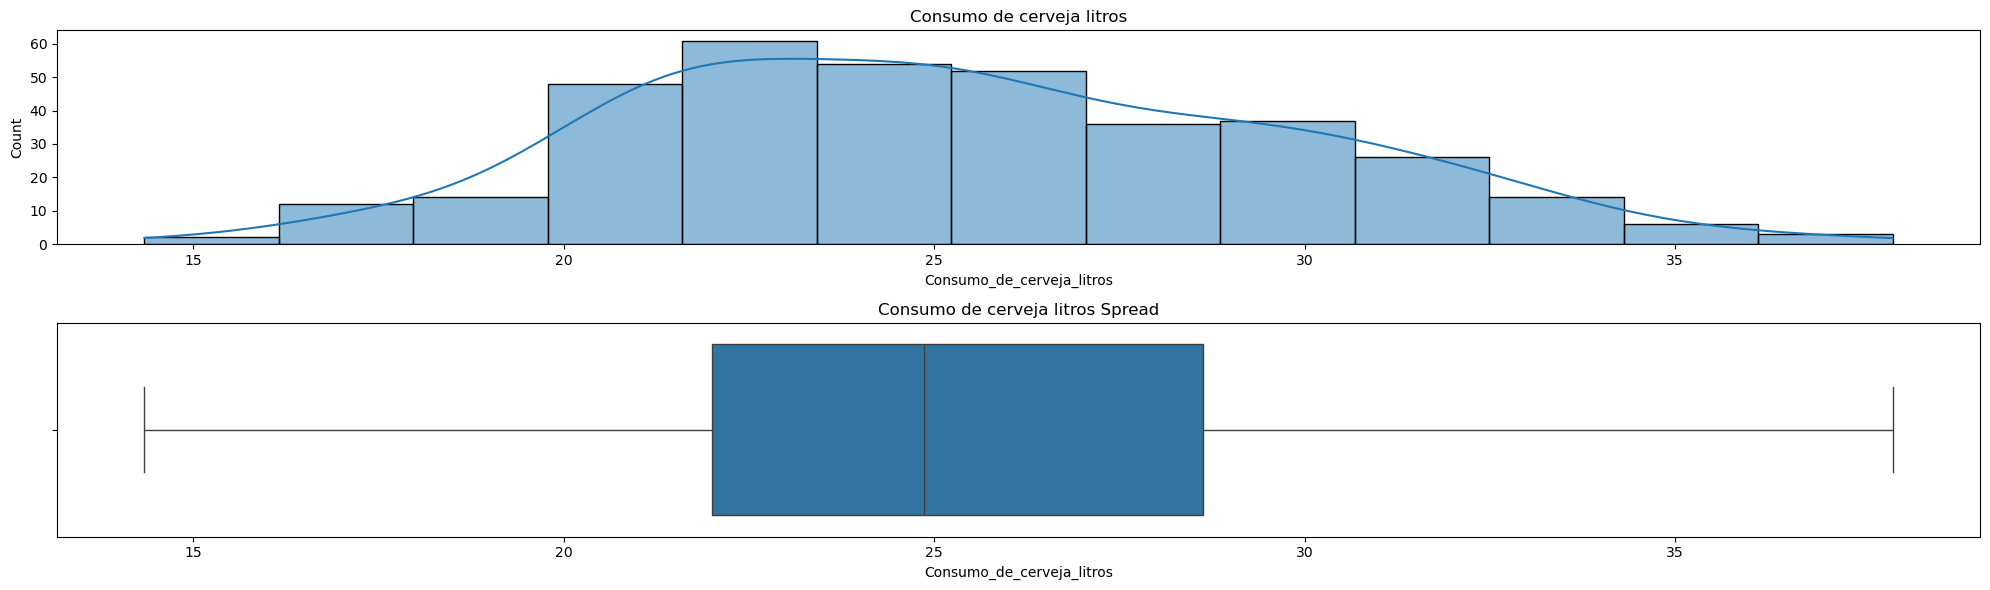

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Consumo de cerveja litros')
sns.histplot(df.Consumo_de_cerveja_litros, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Consumo de cerveja litros Spread')
sns.boxplot(x=df.Consumo_de_cerveja_litros, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


## Skewness helps us to study the shape of the data.

It represents how much a distribution differs from a normal distribution, either to the left or to the right.
The value of the skewness can be either positive, negative or zero.

In [158]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

Temperatura_Media_C         -0.049255
Temperatura_Minima_C        -0.225035
Temperatura_Maxima_C        -0.155435
Precipitacao_mm              3.780119
Final_de_Semana              0.956871
Consumo_de_cerveja_litros    0.270268
dtype: float64


Interpretation: 

The above value represents that the variable Precipitacao_mm, Final_de_Semana and Consumo_de_cerveja_litros are  positively skewed.

The variables Temperatura_Media_C, Temperatura_Minima_C and Temperatura_Maxima_C are negatively skewed.

Note: It is advisable to check the distribution plot before making any conclusion.

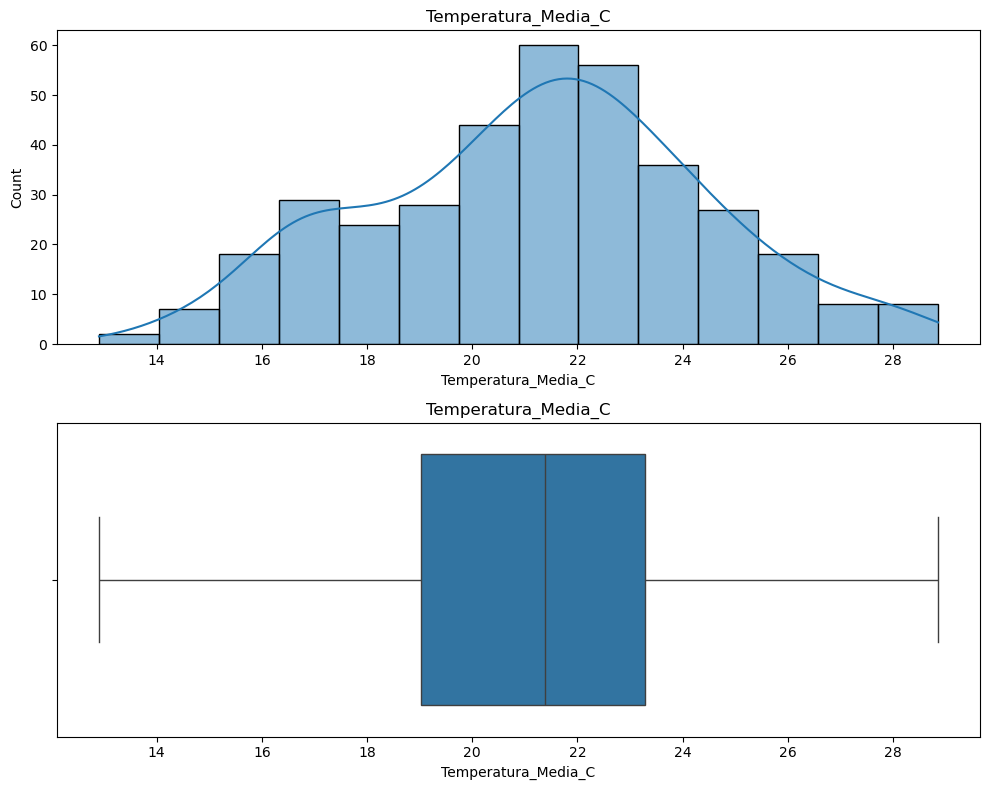

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Temperatura_Media_C')
sns.histplot(df.Temperatura_Media_C, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Temperatura_Media_C')
sns.boxplot(x=df.Temperatura_Media_C, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

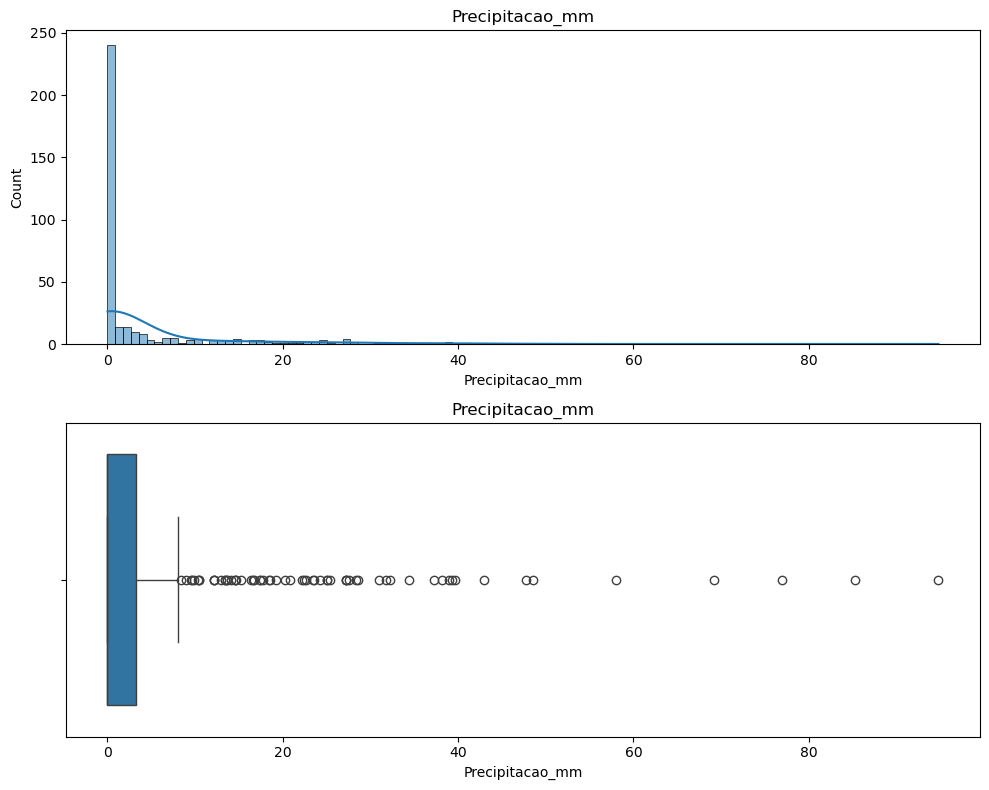

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Precipitacao_mm')
sns.histplot(df.Precipitacao_mm, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Precipitacao_mm')
sns.boxplot(x=df.Precipitacao_mm, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

## Kurtosis measures the peakedness of the distribution

In other words, kurtosis is a statistical measure that defines how the tails of the distribution differ from the normal distribution
Kurtosis identifies whether the tails of a given distribution contain extreme values

## Kurtosis 

Kurtosis a statistical measure that describes the distribution of data points in a dataset relative to the mean and how the tails of the distribution differ from the tails of a normal distribution. Specifically, kurtosis measures the "tailedness" of the data distribution.

### Types of Kurtosis

#### Mesokurtic:

- Kurtosis value: Approximately 3.
- Description: A distribution with kurtosis similar to that of a normal distribution (e.g., Gaussian distribution). It has a moderate peak and tails.

#### Leptokurtic:

- Kurtosis value: Greater than 3.
- Description: A distribution with more extreme outliers than a normal distribution. It has a higher peak and fatter tails. This indicates that the data has heavy tails and more peakedness around the mean.

#### Platykurtic:

- Kurtosis value: Less than 3.
- Description: A distribution with fewer and less extreme outliers than a normal distribution. It has a flatter peak and thinner tails. This indicates that the data has light tails and less peakedness around the mean.

## Interpretation of Kurtosis

### High Kurtosis (Leptokurtic):

Indicates a high level of outliers.
Data tends to have heavy tails and a sharp peak.
Example: Data with frequent large deviations from the mean.

### Low Kurtosis (Platykurtic):

Indicates a low level of outliers.
Data tends to have light tails and a flat peak.
Example: Data that are spread out more evenly around the mean.


In [168]:
# use kurtosis() to calculate the kurtosis
kurtosis = df.kurtosis()

# print the kurtosis
print(kurtosis)

Temperatura_Media_C          -0.414111
Temperatura_Minima_C         -0.569543
Temperatura_Maxima_C         -0.290332
Precipitacao_mm              17.808397
Final_de_Semana              -1.090404
Consumo_de_cerveja_litros    -0.396365
dtype: float64


Interpretation: The above output represents that the variables 

The variable Precipitacao_mm is leptokurtic and rest of them are platykurtic

Note: It is advisable to check the distribution plot before making any conclusion.


There are no categorical data exists in the given dataset

Categorical vs. Numerical Analysis:

Analyzing the distribution of a numerical variable across different categories of a categorical variable.
Box plots, violin plots, and bar charts are often used for visualization.

Categorical vs. Categorical Analysis:

Studying the relationship between two categorical variables.
Cross-tabulations and stacked bar charts can be used for visualization.

In [170]:
df_num.columns

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

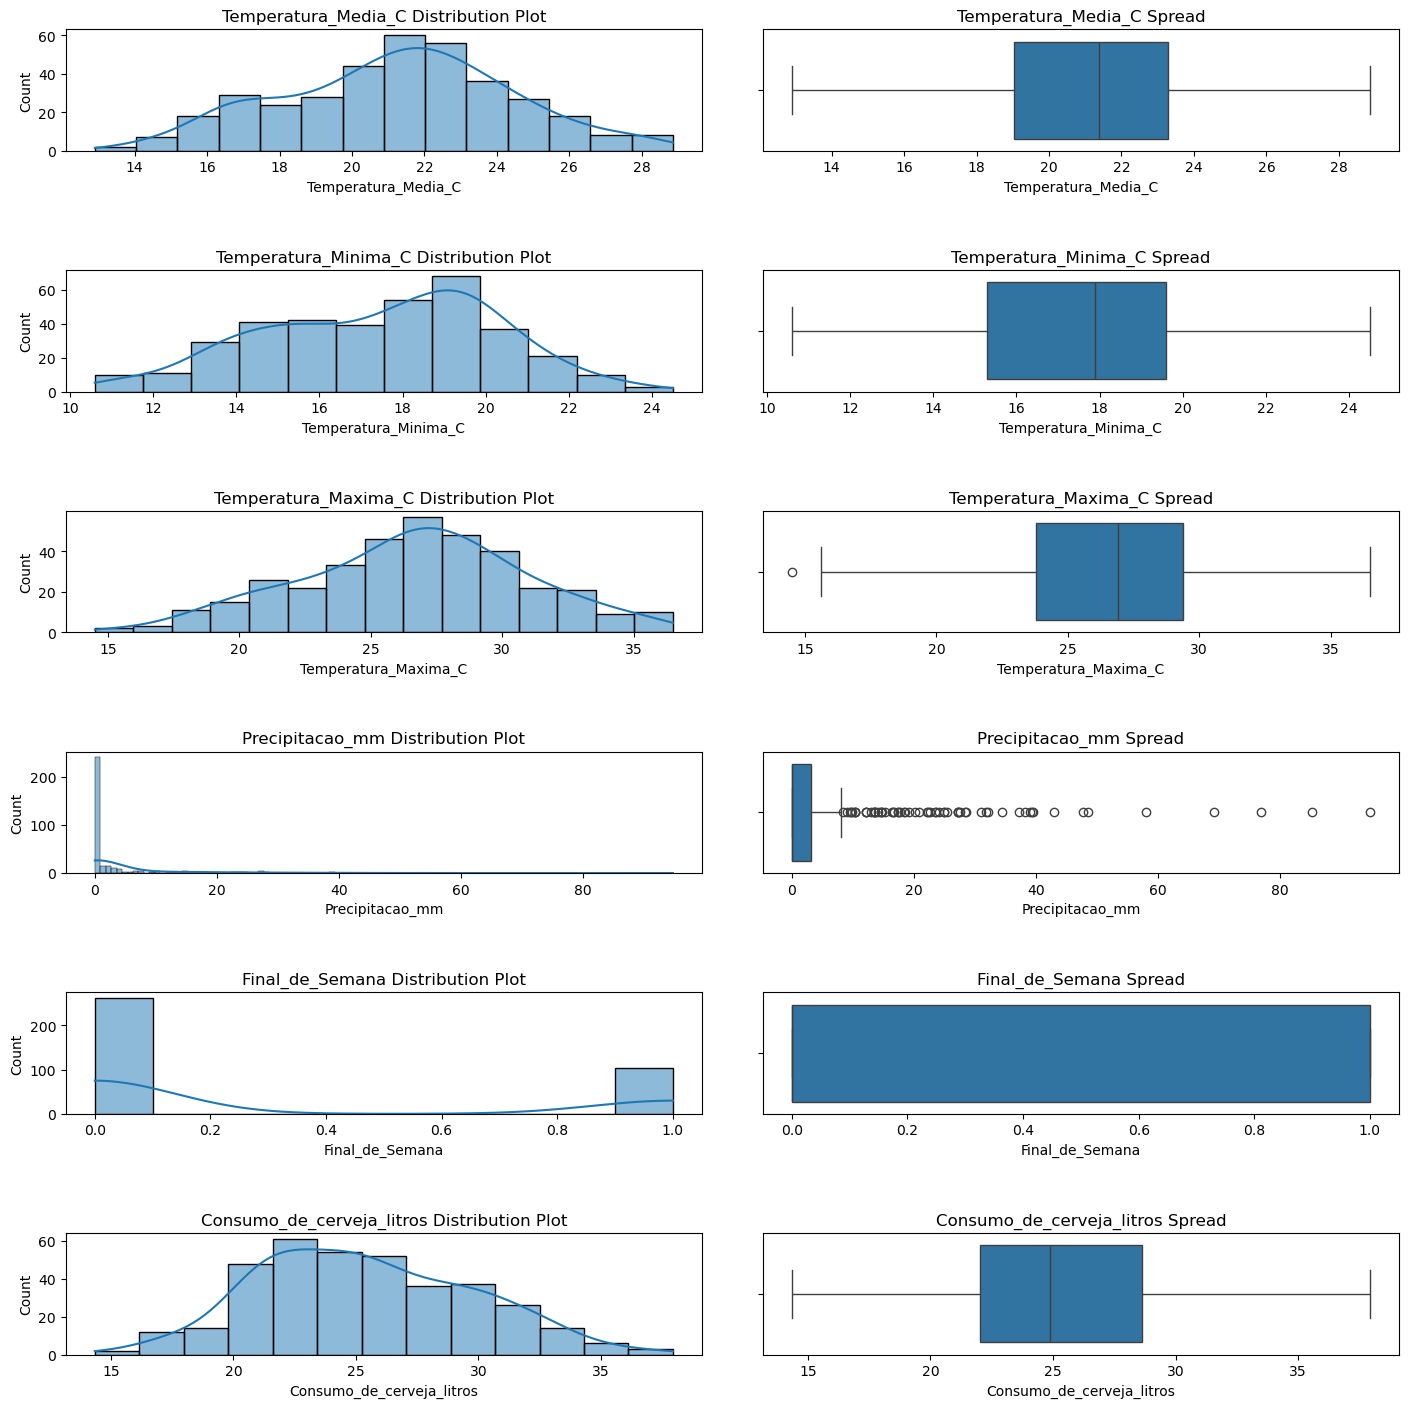

In [172]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

As there are no categorical columns exists in the given dataset 

In [175]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get a list of categorical variables from the DataFrame
# categorical_variables = df_cat.columns[1:]

# # Calculate the number of rows and columns for subplots
# num_rows = 2
# num_cols = 3

# # Create a grid of subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# # Iterate over categorical variables and their corresponding subplots
# for variable, subplot in zip(categorical_variables, axes.flatten()):
#     sns.countplot(data=df, x=variable, ax=subplot)
#     subplot.set_xticklabels(subplot.get_xticklabels())
#     subplot.set_xlabel(variable, fontsize=15)

# plt.tight_layout(pad=4.0)
# plt.show()

## Heatmaps:

Heatmaps provide a visual representation of the correlation matrix, making it easier to identify patterns and relationships among multiple variables.

### Bivariate analysis:

Bivariate Analysis is essential for identifying potential patterns, trends, or dependencies that may inform subsequent steps in the data analysis process. It helps in making informed decisions and generating hypotheses for further investigation.

In [80]:
df.columns

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

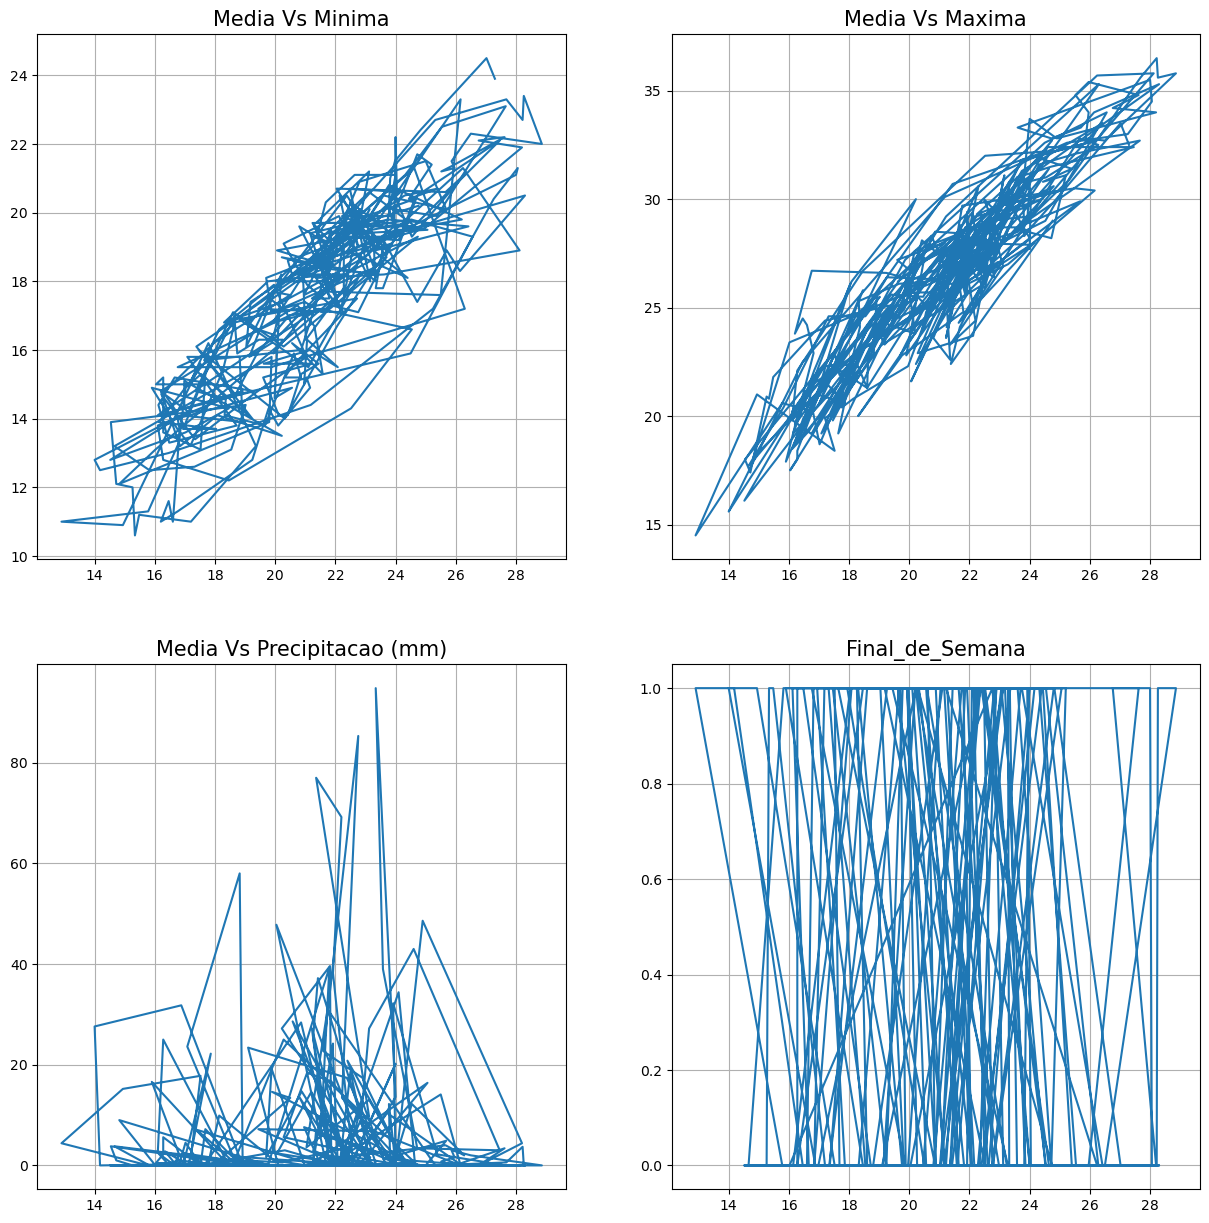

In [81]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Media Vs Minima",fontsize=15)
plt.plot(df["Temperatura_Media_C"], df["Temperatura_Minima_C"])
plt.grid(True)
plt.subplot(2,2,2)
plt.title("Media Vs Maxima",fontsize=15)
plt.plot(df["Temperatura_Media_C"],df["Temperatura_Maxima_C"])
plt.grid(True)
plt.subplot(2,2,3)
plt.title("Media Vs Precipitacao (mm)",fontsize=15)
plt.plot(df["Temperatura_Media_C"],df["Precipitacao_mm"])
plt.grid(True)
plt.subplot(2,2,4)
plt.title("Final_de_Semana",fontsize=15)
plt.plot(df["Temperatura_Media_C"],df["Final_de_Semana"])
plt.grid(True)
plt.show()

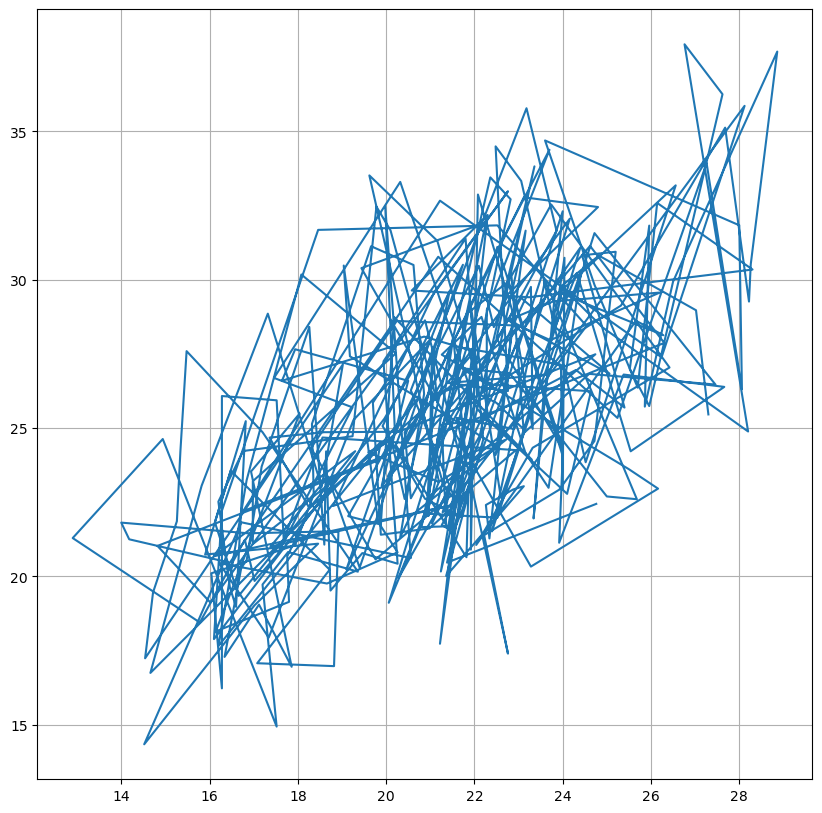

In [83]:
plt.figure(figsize=(10,10))
plt.plot(df["Temperatura_Media_C"],df["Consumo_de_cerveja_litros"])
plt.grid(True)
plt.show()

In [82]:
df.columns

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

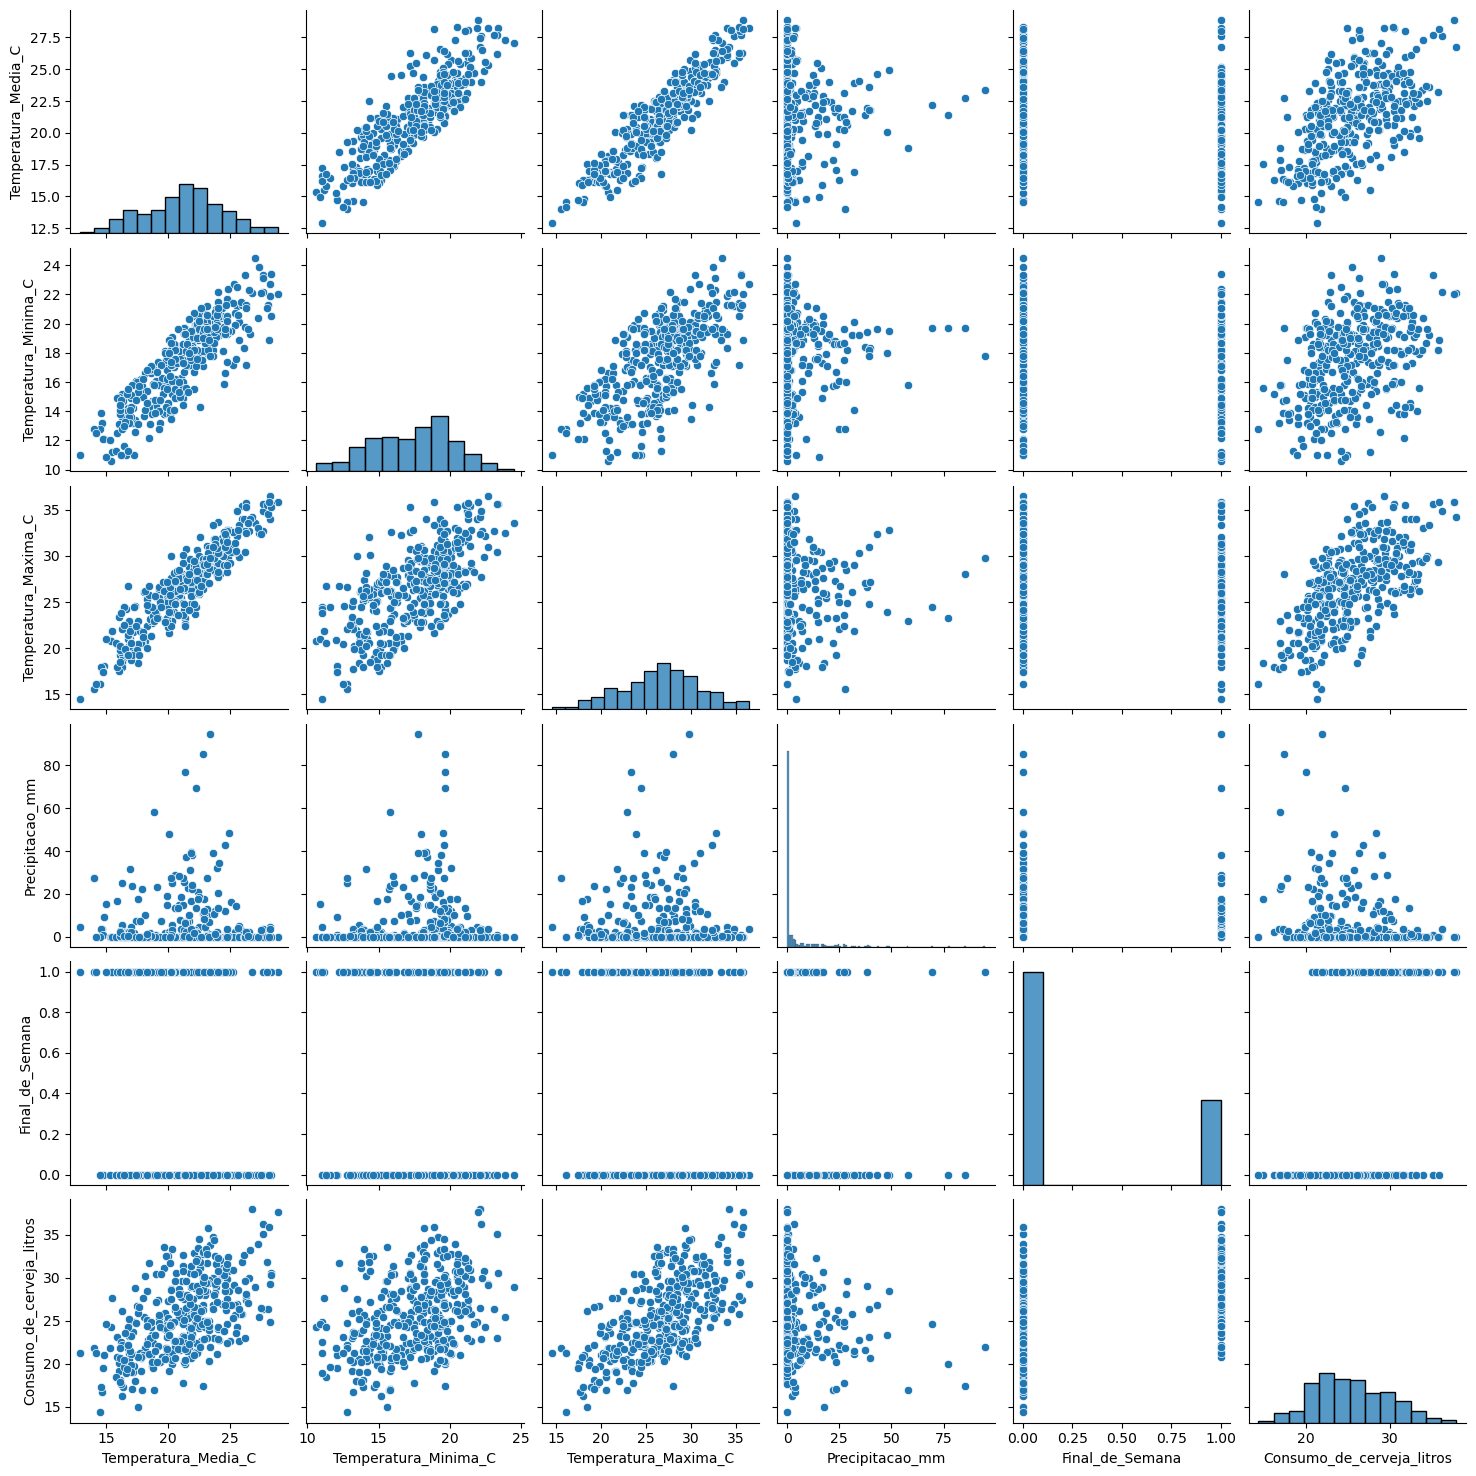

In [84]:
sns.pairplot(df)
plt.show()

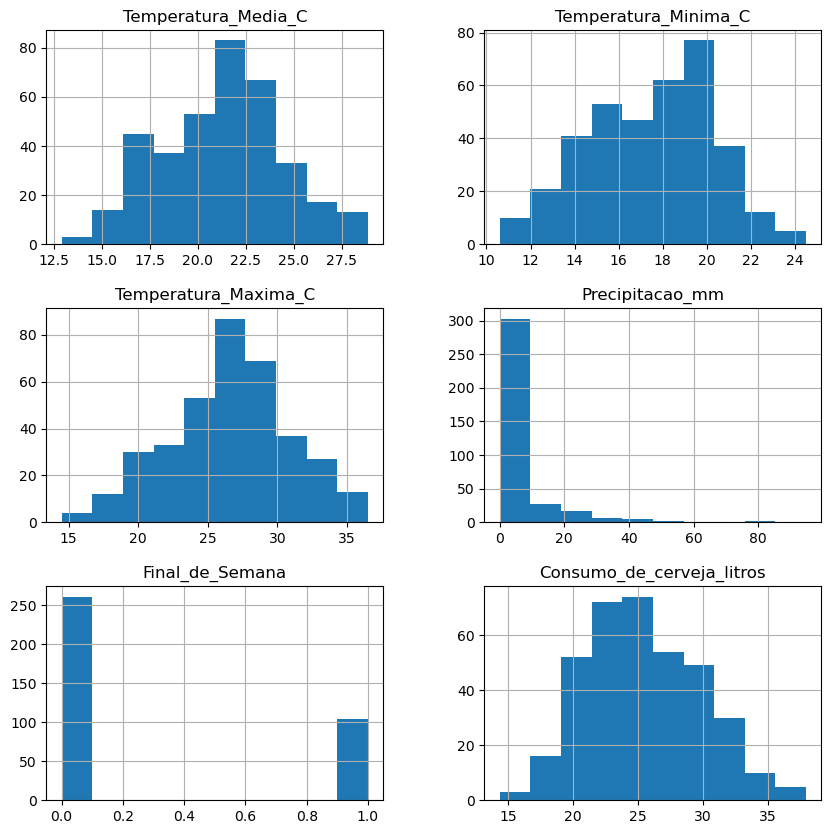

In [85]:
df.hist(figsize=(10,10))
plt.show()